# Bistability in Attractor Spaces
In this problem, we’re going to build “bump” attractors and study their properties. We’re going to be thinking of them as models of hippocampal place cell activity. We’re going to simplify the problem in three ways: 
1. The world our “rats” will live in is going to be 1-dimensional, i.e., a linear track. 
2. Direction isn’t going to matter: pointing one way along the track will be considered equivalent to pointing the other way along the track. 
3. Instead of using spiking neurons, we’re going to use simple firing rate neuron models. These simplifications make the coding a little easier, but still allow getting at some of the basic issues.

For each neuron $i$, we will have two activity variables: $u_i$, which will be roughly analogous to membrane potential; and $r_i$, which will be analogous to firing rate. Inputs from other neurons affect $u_i$. Then $u_i$ gets translated into firing rate $r_i$ by a nonlinear function that doesn't go below below zero and saturates at high firing rates. Each neuron's membrane potential evolves in time according to:

> $\frac{du_i}{dt} = -g_i^{leak} u_i(t) + I_i + I_{global} + \sum\limits_{j}w_{ij}r_j(t)+\sigma_n$

The first term represents a leak conductance that drives $u$ towards the resting membrane potential. Note that for simplicity, here we're going to be using a resting membrane potential of zero, and we're also going to set $g_{leak} = 1 $. The second and third terms represents an external current drive to the neuron. The fourth term is a weighted sum of the firing rates of all the other neurons. The final fifth term is a noise term, which we will assume is Gaussian with mean zero and standard deviation $\sigma_n$, and independent across neurons.

The firing rate of neuron $i$ at any point in time will be defined as:

> $r_i(t) = \frac{1}{2} + \frac{1}{2} \cdot tanh(\frac{u_i(t)-\theta}{\beta})$

Set $\theta = 0.5$ and $\beta = 0.3$ and then plot $r$ as a function of $u$ to get a fool for what this function looks like. It is zero for $u << \theta$; between zero and one when $u$ si within order $\beta$ of $\theta$; and saturates when 1 for $u >> \theta$. 

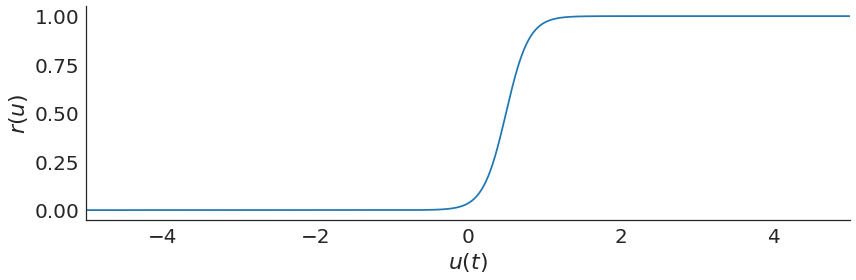

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def firing_rate(u, theta=0.5, beta=0.3):
    return 0.5 + 0.5 * np.tanh( (u - theta) / beta )

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define values for u.
u = np.linspace(-5,5,1000)

## Estimate r.
r = firing_rate(u)

## Plot.
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(u,r)
ax.set(xlim=(u.min(), u.max()), xlabel=r'$u(t)$', ylabel=r'$r(u)$')

sns.despine()
plt.tight_layout()

## Connectivity pattern for a bump attractor
We're not going to set up a pattern of weights that leads to a "bump" attractor. First we order the neurons in space: we're going to say that the index $i$ not only identifies the neuron, but also associates it with position $i$ along a line. Then we define the weight from neuron $j$ to neuron $i$ as:

> $w_{ij} = (w_E \ / \ \sigma_E) \cdot e^{-(i-j)^2 \ / \ 2 \sigma^2_E} - g_I$

This means that neuron $i$ receives excitatory weights from neurons that are within a vicinity $\sigma_E$ of it. It also receives inhibitory weights ($g_I$) from all other neurons, regardless of where they are. (Note: we set $w_{ij}$ to zero for all $i$; that is, we'll have no self-connection weights.)

We've written baseline code for you to work with in this problem set. The idea is to start you off; this code is for you to go into, modify, and chew on as you see fit. Download the Matlab code, unpack it, go to the relevant directory while within Matlab, and type:

> single_bump [ENTER}

The default parameters that you start with will include local excitatory weights and global inhibitory weights as described in equation (3) above, as well as a global drive $I_{global}$ of 2.1. The green plot shows the activity of 150 neurons, connected as above. The noise term, which is different on every time step, is what makes the network lively.

You'll see a smaller axis below the main plot, with a line in black. This represents the inputs $I_i$. Their default value is 0. On the top right of the figure, you'll see three graphical user interface (GUI) entries that say "drive strength" (let’s call this $w_D$), "drive speed" (let's call this $dV$), and "drive position" (let's call this $\mu D$). These control the magnitude of an external drive $I_i$ that will be distributed as a Gaussian, with peak amplitude "drive strength" and centered at neuron "drive position":

> $I_i = w_D \cdot e^{-(i-\mu_D)^2 \ / \ 2 \sigma^2_E} $

> $\frac{d \mu_D}{dt} = dV$

Type 0.05 into "drive strength", press ENTER, and see what happens. Now replace the 0.05 with a 0. Now type 1.5 into "drive strength" and 2 into "drive speed." Have fun! Play with the code at will.

In [2]:
from single_bump import *
sns.set_context('notebook', font_scale=1)
%matplotlib qt5
%load_ext autoreload

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

sb = SingleBump(T=50)
sb.run_simulation(plot=True);

One way to interpret the external drive, $I_i$, is that it represents the net input to hippocampal neurons coming from sensory systems: when the rat is near position $i$, the place cells that are closest to $i$ will be the ones most strongly driven by the sensory input. As the rat moves around, the sensory input changes, and provides drive to other place cells.

## Exercise 1
Are activity bumps in this network really stable? Run the network, starting from the default, $u_i(t=0)=0$, for 50 simulated time points (i.e. until $t = 50$) using different values of $w_D$, ranging from -0.5 to 0.5. Plot the peak value of $r$ at the end of the simulation (namely, $max_i(r_i(t=50))$ as a function of $w_D$. Now repeat this experiment, but this time from having a bump of activity already present, by using the initial values:

> $u_i(t=0) = 4 \cdot e^{-(i - N_{cells}/2)^2 \ / \ 2 \sigma^2_E} $

where $N_{cells}$ is the number of neurons in the simulation. Again plot the peak value of the final $r$ as a function of $w_D$, on the same axes as your immediately previous plot. Explain what you see in your plots.

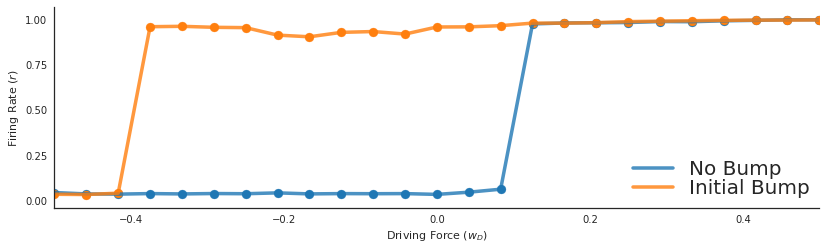

In [3]:
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define single bump parameters.
N = 250
T = 50
sigmaE = 4

## Define range of driving forces, wD.
driving_forces = np.linspace(-0.5, 0.5, 25)

## Define initial "bumps".
bumps = 4 * np.exp( -( np.arange(1,N+1) - N/2 )**2 / (2 * sigmaE ** 2) )
bumps = np.vstack([np.zeros_like(bumps), bumps])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run simulations.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

## Preallocate space.
R = np.zeros((bumps.shape[0], driving_forces.shape[0]))

for j, wD in enumerate(driving_forces):
    
    for i, u0 in enumerate(bumps):
        
        ## Initialize simulation.
        sb = SingleBump(N=N, T=T, wD=wD, u0=u0)

        ## Run simulation.
        r = sb.run_simulation(plot=False)

        ## Extract and store max firing rate.
        R[i,j] = r.max()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
sns.set_context('notebook', font_scale=2)

## Plot.
for arr, color, label in zip(R, sns.color_palette(n_colors=2), ['No Bump', 'Initial Bump']):
    
    ax.plot(driving_forces, arr, lw=3.5, color=color, label=label, alpha=0.8)
    ax.scatter(driving_forces, arr, s=80, color=color)

## Add information
ax.set(xlim=(driving_forces.min(), driving_forces.max()), xlabel=r'Driving Force ($w_D$)',
       ylabel=r'Firing Rate ($r$)')
ax.legend(loc=4, borderpad=0, labelspacing=0)

sns.despine()
plt.tight_layout()

### Answer
In this first example, we simulate firing for a neural circuit (250 neurons) over a period of 50 time units. When the simulated circuit is initialized with its default membrane potential, $u_i(t=0)=0$ (*no bump, blue*), the circuit exhibits sustained firing only after having a driving force $w_D \approx 0.10$ is applied to it. In contrast, when the simulated circuit is initialized with a non-zero default membrane potential (*initial bump, orange*), the circuit exhibits sustained firing after having significantly less driving force applied to it. Interestingly, the sustained firing occurs even if negative driving force is applied up until a threshold of $w_D \approx -0.4$.

## Exercise 2
As described in class, the translational symmetry in how the weights between neurons are arranged implies that there will be translational symmetry in where a stable bump of activity can be created. Using the graphical mode of the code, you can indeed obtain a stable bump anywhere along the line. The fact that the number of neurons being used is finite, however, should mean that we actually have a finite number of discrete stable points and not a true continuum.

Use a small but *perfectly noiseless* network: $N_{cells} = 50, \sigma_\eta = 0$. Keep other parameters at their default values. For $\mu_0$ ranging in small steps from $\frac{N_{cells}}{2}-3$ to $\frac{N_{cells}}{2}+3$, initialize $u$ as :

> $u_i(t=0) = 4 \cdot e^{-(i-\mu_0)^2 \ / \ 2 \sigma^2_E}$

and then run the simulation until t = 50. Where is the bump at the end of each simulation? 

To answer this question and estimate the bump's location, compute the bump's center of mass. If the bump stayed where it started, then it's center of mass at the end of each simulation should be $\mu_0$. Plot the difference between the bump’s center of mass at $t = 50$ and $\mu_0$ as a function of µ0. Explain the features that you see; include a comment on the magnitude of the y-axis values of data in your plot, and comment in terms of line attractors and Lyapunov function landscapes.

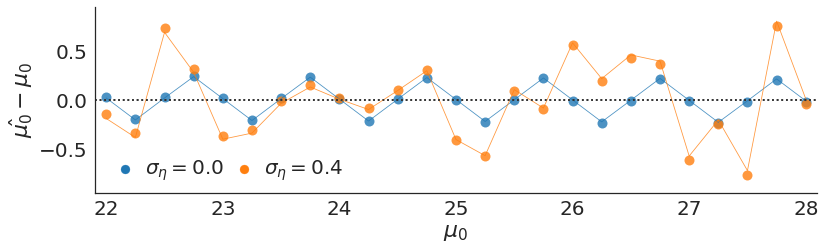

In [4]:
%autoreload
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define single bump parameters.
N = 50
T = 50
sigmaE = 4
noise = [0.0, 0.4] # Noise

## Define center of bump.
loc = np.arange(1,N+1)
mu = np.linspace(N/2 - 3, N/2 + 3, 25)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

## Define useful functions.
def center_of_mass(x, w):
    return np.inner(x,w) / np.sum(w)

## Preallocate space.
mu_hat = np.zeros((len(mu), len(noise)))

for i, m0 in enumerate(mu):
    
    ## Compute u0.
    u0 = 4 * np.exp( -( loc - m0 )**2 / 2 * sigmaE ** 2 )
    
    for j, sigmaN in enumerate(noise):
    
        ## Initialize simulation.
        sb = SingleBump(N=N, T=T, sigmaN=sigmaN, u0=u0)

        ## Run simulation.
        r = sb.run_simulation(plot=False)

        ## Estimate center of mass.
        mu_hat[i,j] = center_of_mass(loc, r)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
sns.set_context('notebook', font_scale=2)

## Plot.
for arr, color, label in zip(mu_hat.T, sns.color_palette(n_colors=2), 
                           [r'$\sigma_\eta = 0.0$', r'$\sigma_\eta = 0.4$']):
    
    ax.plot(mu, arr-mu, color=color, lw=0.8, alpha=0.8)
    sns.residplot(mu, arr-mu, color=color, scatter_kws=dict(s=100), ax=ax)
    ax.scatter([], [], s=80, color=color, label=label)
    
## Add information.
ax.set(xlim=(21.9,28.1), xlabel=r'$\mu_0$', ylim=(-0.95, 0.95), ylabel=r'$\hat{\mu_0} - \mu_0$')
ax.legend(loc=3, ncol=2, borderpad=0, handletextpad=0, columnspacing=0)

sns.despine()
plt.tight_layout()

### Answer
Something something... Pretty obvious that it oscillates around discrete intervals (whole integers and half numbers).

## Exercise 3
So far, it looks like we have a cute candidate network for place cells. One key aspect of place cells that we have not yet accounted for, however, is that if rats are made familiar with different environments, hippocampal cells will develop place fields for the different environments. But a cell's place field in one environment doesn't predict anything about the location of the same cell's place field in a different environment. In particular, two neighboring place fields in one environment need not be neighbors in another environment. In other words, the hippocampus appears to be capable of supporting multiple different and completely independent place field maps. Can our network reproduce this? 

Let's consider two environments, $A$ and $B$, both of which are linear tracks of the same length. Let the center of the place field of neuron $i$ in environment $A$ be at position $A_i$ along track $A$. Let the center of the same cell's place field in environment $B$ be at position $B_i$ along track $B$. We'll model the map $M : A_i \rightarrow B_i$ as a random permutation of the sequence $1,2,...,N_{cells}$.

Modify the code of *single_bump.py* so that, in addition to local excitatory weights for neighboring neurons in environment $A$, you also add local excitatory weights for neighboring neurons in environmental $B$. That is:

> $w_{ij} = (w_E/\sigma_E) \cdot (e^{-(A_i-A_j)^2 \ / \ 2 \sigma^2_E} + e^{-(B_i-B_j)^2 \ / \ 2 \sigma^2_E} ) - g_I$

Similarly, you could have duplicate input controls, so that you have:

> $I_i = w_{DA} \cdot e^{-(A_i-\mu_{DA})^2 \ / \ 2 \sigma^2_E} + w_{DB} \cdot e^{-(B_i-\mu_{DB})^2 \ / \ 2 \sigma^2_E} $

such that

> $\frac{d \mu_{DA}}{dt} = dV_A$

> $\frac{d \mu_{DB}}{dt} = dV_B$


Then further modify the code that you duplicate the display of the activity of the network and its inputs: in one copy, the neuronal firing rates and their input, $I_i$, should be arranged according to the space $A_i$. In the other copy, they should be arranged according to the space $B_i$. It should be the same data in both copies: the only difference should be in the ordering of the neurons. (You'll also have to duplicate the GUI controls. You can think of the A drive as the sensory drive that would occur if the rat were on track A, and the B drive as the sensory drive that would occur if the rat were on track B.)

In [5]:
from double_bump import *
sns.set_context('notebook', font_scale=1)
%matplotlib qt5
%autoreload

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

db = DoubleBump(T=50)
db.run_simulation(plot=True);

## Exercise 4
Using $N_{cells} = 200$ and the GUI controls, play with the network and see whether you can produce stable bumps of activity anywhere along the A line and anywhere along the B line. Can you produce simultaneous bumps in both spaces that remain stable even when the external sensory drives go to zero ($w_{DA} = 0$ and $w_{DB} = 0$)? 

In [ ]:
%autoreload

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define double bump parameters.
N = 200

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

db = DoubleBump(N=N)
db.run_simulation(plot=True);

### Answer
Though stable bumps are possible, simultaneous bumps in the same space does not seem possible?

## Exercise 5
What happens if the rat is confused as to which track it's on? Start the poor fellow from thinking it's in a mix of the two spaces:

> $u_i(t=0)= 3 \cdot e^{-(A_i - \mu_{0A})^2 \ / \ 2 \sigma^2_E} + 3 \cdot e^{-(B_i - \mu_{0B})^2 \ / \ 2 \sigma^2_E} $

where $\mu_{0A}$ and $\mu_{0B}$ can be any two values within $[1, N_{cells}]$. We'll keep the lights off for the rat so it can't just see which environment it's in. In our model, this means $w_{DA} = 0$ and $w_{DB} = 0$. Run the simulation until $t = 30$ several times. What do you observe? 

In [ ]:
np.random.seed(47404)
%autoreload

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define double bump parameters.
N = 200
T = 30
sigmaE = 4

## Define mapping.
mapping = np.random.choice(np.arange(N), N, replace=False)

## Define initial "bumps".
u0_A = 3 * np.exp( -( np.arange(N) -  25 )**2 / 2*sigmaE**2 ) # Track A, center = 25
u0_B = 3 * np.exp( -( np.arange(N) - 125 )**2 / 2*sigmaE**2 ) # Track B, center = 125
u0 = u0_A + u0_B[np.argsort(mapping)]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize simulation.
db = DoubleBump(N=N, T=T, mapping=mapping, u0=u0)

## Run simulation.
r1, r2 = db.run_simulation(plot=True);

### Answer
The simulation is not stable -- two peaks cannot be maintained. The neural circuit stabilizes to one peak.

Devise a quantitative measure that will take a vector of firing rates $r_i$ and tell you whether there is a bump of activity in space $S$, where $S$ could be either $A$ or $B$. Call your measure $\beta_S$. Your measure should be such that $\beta_S$ is low if there is a coherent, large amplitude bump in space $S$, high if there isn't, and have intermediate values for ambiguous situations. Run your simulation 50 times, and for each time, compute  $\beta_A$ and  $\beta_B$. Plot them against each other in a scatterplot. Explain and comment on the features that you see. Is there more than one value of $\mu_{0A}$ or $\mu_{0B}$ that would produce an equivalent plot? Comment on the relationship to the flip-flop and binocularly rivalry problems in this problem set.

In [ ]:
from scipy.optimize import curve_fit

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define double bump parameters.
N = 200
T = 30
sigmaE = 4

## Define simulation parameters.
n_sim = 20

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define useful functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def gaussian_curve(x, mu, sd, A):
    return A * np.exp(-np.power(x-mu,2)/(2*sd**2) )

def rms(arr):
    return np.sqrt( np.mean( np.power(arr,2) ) )
    
def compute_beta(s, r, sd=4, A=1, maxfev=10000):
    '''Computes beta_s, defined as the root-mean-square error
    of a Gaussian curve fit to the firing rate data.
    
    INPUTS
    - s:  environmental space (e.g. neuron identity)
    - r:  firing rate
    - sd: standard deviation of Gaussian curve
    - A:  amplitude of Gaussian curve'''
    
    ## Find center of best-fitting Gaussian.
    f = lambda x, mu: gaussian_curve(x, mu, sd, A)
    mu_hat, _ = curve_fit(f, s, r, bounds=(s.min(), s.max()), maxfev=maxfev)
    
    ## Compute error.
    error = rms( r - f(s, mu_hat) )
    return mu_hat, error

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

## Preallocate space.
beta = np.zeros((n_sim, 2))

## Main loop.
for i in range(n_sim):

    ## Define mapping.
    mapping = np.random.choice(np.arange(N), N, replace=False)

    ## Define initial "bumps".
    u0_A = 3 * np.exp( -( np.arange(N) - np.random.randint(0, N) )**2 / 2*sigmaE**2 ) # Track A
    u0_B = 3 * np.exp( -( np.arange(N) - np.random.randint(0, N) )**2 / 2*sigmaE**2 ) # Track B
    u0 = u0_A + u0_B[np.argsort(mapping)]
    
    ## Initialize simulation.
    db = DoubleBump(N=N, T=T, mapping=mapping, u0=u0)
    
    ## Run simulation.
    r1, r2 = db.run_simulation(plot=False);
    
    ## Compute betas.
    _, beta[i,0] = compute_beta(s, r1)
    _, beta[i,1] = compute_beta(s, r2)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
sns.set_context('notebook', font_scale=2)

## Plot.
ax.scatter(*beta.T)

sns.despine()
plt.tight_layout()

## Exercise 6
Let's re-do an experiment that we did with the singe-environment network. Once again, we'll use a perfectly noiseless network: set $\sigma_\eta = 0$. For $\mu_0$ ranging $[1, N_{cells}]$, initialize $u$ as:

> $u_i(t=0) = 4 \cdot e^{-(A_i - \mu_{0})^2 \ / \ 2 \sigma^2_E} $

and run a simulation until t = 20. As before, measure the center of mass of $r_{Ai}(t = 20)$ and plot the difference between the center of mass and $\mu_0$ as a function of $\mu_0$. Explain what you see, and compare to the equivalent noiseless single-environment network.

## Exercise 7
For our final act, we'll have the rat run around with its eyes open on a track that looks like a mixture of track $A$ and track $B$. To model this, we'll use $w_{DA} = 0.3$, $w_{DB} = 0.3$. That is, the rat receives drive that is both $A$-like and $B$-like. We will also use $N_{cells} = 100$, $dV_A = −1$, $dV_B = 1$, $g_I = 0.3$, $w_E = 0.8$. Run this simulation in the graphical mode.

What do you see as time progresses beyond the first few time units? Does the bump always stay in one of the two spaces? How would you describe conditions that promote switching from one space to the other?

In [16]:
sns.set_context('notebook', font_scale=1)
%matplotlib qt5
%autoreload

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define double bump parameters.
N = 100
T = 1000
gI = 0.3
wE = 0.8

wD1 = 0.3
dV1 = -1

wD2 = 0.3
dV2 = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# np.random.seed(47404)

## Initialize simulation.
db = DoubleBump(N=N, T=T, gI=gI, wE=wE, wD1=wD1, dV1=dV1, wD2=wD2, dV2=dV2, dt=0.15)

## Run simulation.
r1, r2 = db.run_simulation(plot=True, sleep=0);

### Answer
As time progresses beyond the first few time units, dominance of one of the two spaces emerges. The dominant bump then moves around the space. 